# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hanif Izza Pratama
- **Email:** hanifheinrich@gmail.com
- **ID Dicoding:** hanifheinrich

## Menentukan Pertanyaan Bisnis

Sistem berbagi sepeda adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian kembali telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya kembali ke posisi lain. Proses penyewaan sepeda bersama sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca,curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. dapat mempengaruhi perilaku penyewaan. 
- Bagaimana pengaruh musim (season) dan weathershit terhadap total sewa sepeda?
- Bagaimana perbandingan jumlah pengguna casual dan register?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

**Insight:**
- Bike Sharing Dataset ini memiliki dua dataset yaitu day.csv dan hour.csv. Dua dataset ini mewakili fakta yang sama dengan satuan waktu yang berbeda (satu dalam hari, satu dalam jam)
- Dikarenakan analisis saya fokus kepada pengaruh luar terhadap jumlah penggunaan Bike Sharing, maka tidak dilakukan data gathering.

### Assessing Data

In [7]:
bike_df = pd.read_csv("dataset/day.csv")
bike_df.info()
bike_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
#Identify Missing Value
bike_df = pd.read_csv("dataset/day.csv")
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Identify Duplicate Date
bike_df = pd.read_csv("dataset/day.csv")
bike_df.duplicated().sum()

0

In [5]:
#Identify Outlier

numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_summary = {}
for col in numeric_columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, col)
    outliers_summary[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': len(outliers),
        'outliers_indices': outliers.index.tolist()
    }

for col, summary in outliers_summary.items():
    print(f"Kolom: {col}")
    print(f"  Batas Bawah: {summary['lower_bound']}")
    print(f"  Batas Atas: {summary['upper_bound']}")
    print(f"  Jumlah Outlier: {summary['outliers_count']}")
    print(f"  Indeks Outlier: {summary['outliers_indices']}\n")


Kolom: temp
  Batas Bawah: -0.13968799999999998
  Batas Atas: 1.13448
  Jumlah Outlier: 0
  Indeks Outlier: []

Kolom: atemp
  Batas Bawah: -0.07156812499999998
  Batas Atas: 1.020732875
  Jumlah Outlier: 0
  Indeks Outlier: []

Kolom: hum
  Batas Bawah: 0.2126346249999999
  Batas Atas: 1.0449196250000001
  Jumlah Outlier: 0
  Indeks Outlier: []

Kolom: windspeed
  Batas Bawah: -0.010258500000000004
  Batas Atas: 0.3753135
  Jumlah Outlier: 3
  Indeks Outlier: [234, 372, 681]

Kolom: casual
  Batas Bawah: -886.125
  Batas Atas: 2322.875
  Jumlah Outlier: 41
  Indeks Outlier: [144, 180, 192, 242, 277, 431, 437, 445, 451, 458, 459, 465, 479, 486, 493, 494, 500, 501, 502, 507, 508, 514, 521, 522, 528, 529, 539, 549, 557, 570, 584, 598, 599, 606, 612, 619, 620, 626, 633, 647, 654]

Kolom: registered
  Batas Bawah: -915.125
  Batas Atas: 8237.875
  Jumlah Outlier: 0
  Indeks Outlier: []

Kolom: cnt
  Batas Bawah: -1015.625
  Batas Atas: 10243.375
  Jumlah Outlier: 0
  Indeks Outlier: []



In [9]:
df = pd.read_csv('dataset/day.csv')
# Filter data untuk outlier
outliers = df[(df['hum'] < 0.20468725) | (df['hum'] > 1.0455212500000002)]
print(outliers[['hum']])


         hum
49  0.187917
68  0.000000


In [10]:
df = pd.read_csv('dataset/day.csv')
# Filter data untuk outlier
outliers = df[(df['windspeed'] < -0.012446750000000034) | (df['windspeed'] > 0.38061125)]
print(outliers[['windspeed']])


     windspeed
44    0.417908
49    0.507463
93    0.385571
94    0.388067
292   0.422275
382   0.415429
407   0.409212
420   0.421642
432   0.441563
433   0.414800
450   0.386821
666   0.398008
721   0.407346


**Insight:**
- Jumlah missing value pada 16 kolom dataset Bike sharing adalah 0
- Jumlah data duplicate pada dataset Bike sharing adalah 0
- Jumlah outlier data pada kolom windspeed sebanyak 13.
- Junlah outlier data pada kolom hum sebanyak 2 dengan nilai 0% dan 18%. Nilai humidity 18% masih mungkin dicapai di Portugal tetapi tidak untuk 0%.



### Cleaning Data

In [3]:
data = pd.read_csv('dataset/day.csv')

# Ubah kolom dteday menjadi tipe datetime
data['dteday'] = pd.to_datetime(data['dteday'])

#Cek outlier
def get_outlier_bounds(df, column):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    return lower_bound, upper_bound

#Drop Outlier Windspeed
lower_bound_windspeed, upper_bound_windspeed = get_outlier_bounds(data, 'windspeed')
data_cleaned = data[(data['windspeed'] >= lower_bound_windspeed) & (data['windspeed'] <= upper_bound_windspeed)]

print(f"Jumlah baris sebelum penghapusan: {len(data)}")
print(f"Jumlah baris setelah penghapusan: {len(data_cleaned)}")
print(f"Jumlah baris yang dihapus: {len(data) - len(data_cleaned)}")

# Cek Median kolom hum
median_hum = data_cleaned['hum'].median()

#Cek outlier hum
lower_bound_hum, upper_bound_hum = get_outlier_bounds(data_cleaned, 'hum')
outlier_indices_hum = data_cleaned[(data_cleaned['hum'] < lower_bound_hum) | (data_cleaned['hum'] > upper_bound_hum)].index

print(f"Indeks outlier pada kolom 'hum': {outlier_indices_hum.tolist()}")

#Imputation nilai outlier ke median
data_cleaned.loc[outlier_indices_hum, 'hum'] = median_hum

data_cleaned.to_csv('dataset/cleaned_data.csv', index=False)


Jumlah baris sebelum penghapusan: 731
Jumlah baris setelah penghapusan: 718
Jumlah baris yang dihapus: 13
Indeks outlier pada kolom 'hum': [68]


**Insight:**
- Cleaning yang saya lakukan pada dataset ini adalah drop dan imputation
- Dikarenakan nilai outlier kolom windspeed cukup banyak dan nilainya tidak jelas maka nilai tersebut saya hapus (drop)
- Dikarenakan nilai outlier kolom hum sedikit dan masih masuk akal (meskipun ada satu yang tidak masuk akal) saya menggunakan imputation ke nilai median

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
# melihat rangkuman parameter statistik dari data day_df 
data.describe(include="all")

C:\Users\hanif\AppData\Local\Temp\ipykernel_16692\2194350388.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [7]:
# Mapping nilai season ke nama musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Menambahkan kolom season dengan nama musim
data['season_label'] = data['season'].map(season_mapping)

# Melihat jumlah penyewaan tiap season
season_rental_summary = (
    data.groupby(by="season_label").cnt.sum()
    .sort_values(ascending=False)
    .reset_index()
)
print(season_rental_summary)

  season_label      cnt
0         Fall  1061129
1       Summer   918589
2       Winter   841613
3       Spring   471348


In [ ]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul 
data.groupby(by="yr").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
yr,,
0,995851,247252
1,1676811,372765


**Insight:**
- Penyewaan sepeda tertinggi terjadi di musim gugur, diikuti musim panas, musim dingin, dan terendah di musim semi.
- Pada tahun 2011, jumlah anggota terdaftar mencapai 995.851, jauh lebih tinggi dibandingkan pengguna non-anggota yang hanya 247.252.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim (season) dan weathershit terhadap total sewa sepeda?

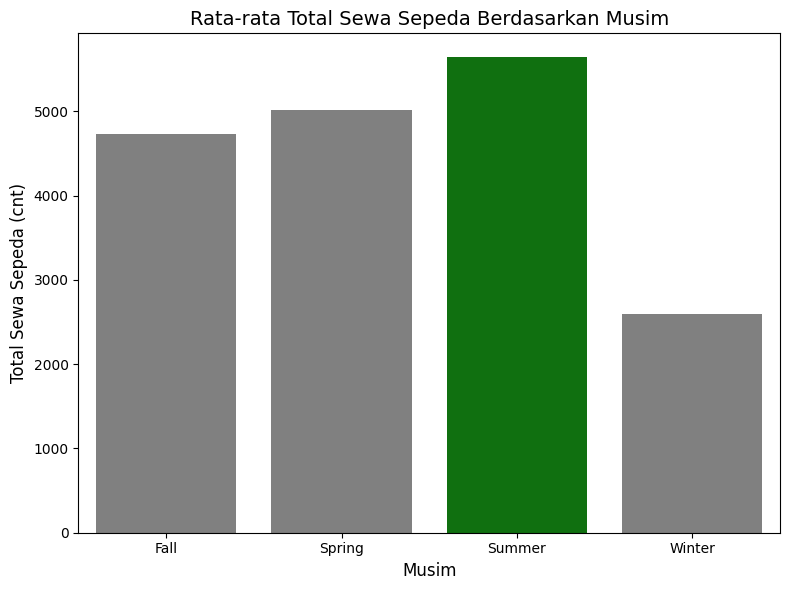

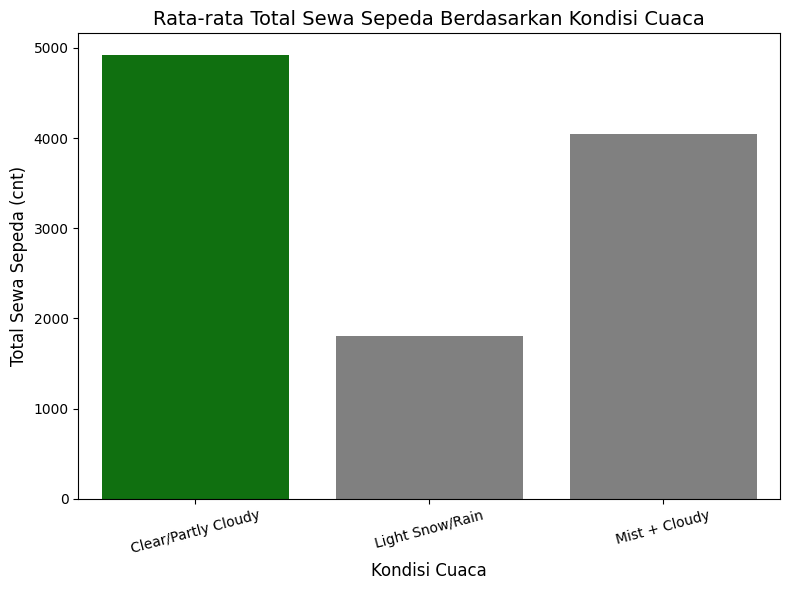

In [9]:
# Membaca dataset
data = pd.read_csv('dataset/cleaned_data.csv')

# Mapping nilai numerik season dan weathersit ke nama kategori
season_mapping = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}

weathersit_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

#Visualisasi 1
data['season_name'] = data['season'].map(season_mapping)
data['weathersit_name'] = data['weathersit'].map(weathersit_mapping)

season_mean = data.groupby('season_name')['cnt'].mean()
colors_season = ['green' if val == season_mean.max() else 'gray' for val in season_mean]

plt.figure(figsize=(8, 6))
sns.barplot(x=season_mean.index, y=season_mean.values, palette=colors_season)
plt.title('Rata-rata Total Sewa Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Sewa Sepeda (cnt)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


#Visualisasi 2
weathersit_mean = data.groupby('weathersit_name')['cnt'].mean()
colors_weathersit = ['green' if val == weathersit_mean.max() else 'gray' for val in weathersit_mean]

plt.figure(figsize=(8, 6))
sns.barplot(x=weathersit_mean.index, y=weathersit_mean.values, palette=colors_weathersit)
plt.title('Rata-rata Total Sewa Sepeda Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Total Sewa Sepeda (cnt)', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana perbandingan jumlah pengguna casual dan register? 

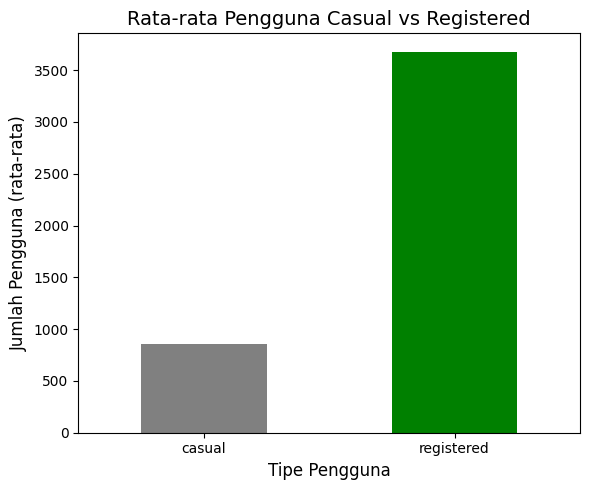

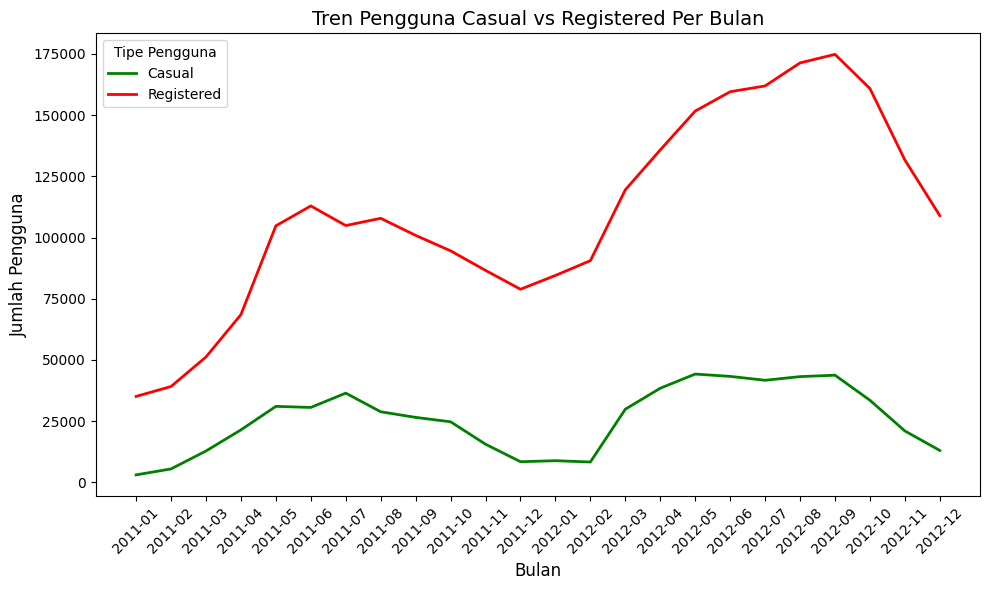

In [12]:
# Membaca dataset
data = pd.read_csv('dataset/cleaned_data.csv')

# Visualisasi 1: Perbandingan Jumlah Pengguna Casual vs Registered
avg_users = data[['casual', 'registered']].mean()
colors_users = ['green' if val == avg_users.max() else 'gray' for val in avg_users]
plt.figure(figsize=(6, 5))
avg_users.plot(kind='bar', color=colors_users)
plt.title('Rata-rata Pengguna Casual vs Registered', fontsize=14)
plt.xlabel('Tipe Pengguna', fontsize=12)
plt.ylabel('Jumlah Pengguna (rata-rata)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Visualisasi 2: Tren Pengguna Casual vs Registered
# Konversi kolom 'dteday' menjadi datetime dan tambahkan kolom bulan
data['dteday'] = pd.to_datetime(data['dteday'])
data['month'] = data['dteday'].dt.to_period('M')

monthly_trend = data.groupby('month')[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_trend['month'].astype(str), monthly_trend['casual'], label='Casual', color='green', linewidth=2)
plt.plot(monthly_trend['month'].astype(str), monthly_trend['registered'], label='Registered', color='red', linewidth=2)
plt.title('Tren Pengguna Casual vs Registered Per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Tipe Pengguna', fontsize=10)
plt.tight_layout()
plt.show()



**Insight:**
- Musim Summer memiliki rata-rata penyewaan sepeda tertinggi, sementara Winter terendah. Selain itu, kondisi cuaca Clear/Partly Cloudy menunjukkan penyewaan sepeda yang lebih tinggi dibandingkan dengan kondisi Light Snow/Rain.
- Pengguna registered mendominasi baik secara rata-rata maupun tren bulanan, meski mengalami penurunan sejak 2021, sementara pengguna casual relatif stabil.

## Analisis Lanjutan (Opsional)

## Conclusion

#Pertanyaan 1
- Bagaimana pengaruh musim (season) dan weathershit terhadap total sewa sepeda?
- Musim Summer memiliki rata-rata penyewaan sepeda tertinggi, sementara Winter terendah. Selain itu, kondisi cuaca Clear/Partly Cloudy menunjukkan penyewaan sepeda yang lebih tinggi dibandingkan dengan kondisi Light Snow/Rain.
- Penyewaan sepeda cenderung meningkat pada musim panas dan cuaca cerah, menunjukkan bahwa faktor musim dan kondisi cuaca berperan signifikan dalam memengaruhi perilaku pengguna.

#Pertanyaan 2
- Bagaimana perbandingan jumlah pengguna casual dan register?
- Pengguna registered mendominasi baik secara rata-rata maupun tren bulanan, meski mengalami penurunan sejak 2021, sementara pengguna casual relatif stabil.
- Fokus pada pengguna registered yang mendominasi, namun mulai menurun sejak 2021, dapat membuka peluang untuk strategi retensi, sementara stabilitas pengguna casual menunjukkan potensi untuk peningkatan konversi.